In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all', '/Users/mia/anaconda3/lib/python312.zip', '/Users/mia/anaconda3/lib/python3.12', '/Users/mia/anaconda3/lib/python3.12/lib-dynload', '', '/Users/mia/anaconda3/lib/python3.12/site-packages', '/Users/mia/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/mia/anaconda3/lib/python3.12/site-packages/setuptools/_vendor']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [4]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all
Train Basin File Exists: True


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [6]:
params = {
    "epochs":3,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

[UCB Trainer] Using CPU (unhandled gpu=-1).


In [7]:
lstmNoPhysicsDaily.train()

2025-03-19 16:50:00,854: Logging to /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000/output.log initialized.
2025-03-19 16:50:00,855: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000
2025-03-19 16:50:00,855: ### Run configurations for testing_run
2025-03-19 16:50:00,856: experiment_name: testing_run
2025-03-19 16:50:00,856: train_basin_file: calpella
2025-03-19 16:50:00,856: validation_basin_file: calpella
2025-03-19 16:50:00,857: test_basin_file: calpella
2025-03-19 16:50:00,857: train_start_date: 1994-10-01 00:00:00
2025-03-19 16:50:00,858: train_end_date: 2002-09-30 00:00:00
2025-03-19 16:50:00,858: validation_start_date: 2002-10-01 00:00:00
2025-03-19 16:50:00,859: validation_end_date: 2005-09-30 00:00:00
2025-03-19 16:50:00,859: test_start_date: 2005-10-01 00:00:00
2025-03-19 16:50:00,859: test_end_date: 2009-09-30 00:00:00
2025-03-19 16:50:00,860: devi

/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]
2025-03-19 16:50:23,992: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000/validation/model_epoch003/validation_metrics.csv
2025-03-19 16:50:23,993: Stored results at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000/validation/model_epoch003/validation_results.p


PosixPath('/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000')

got predictions


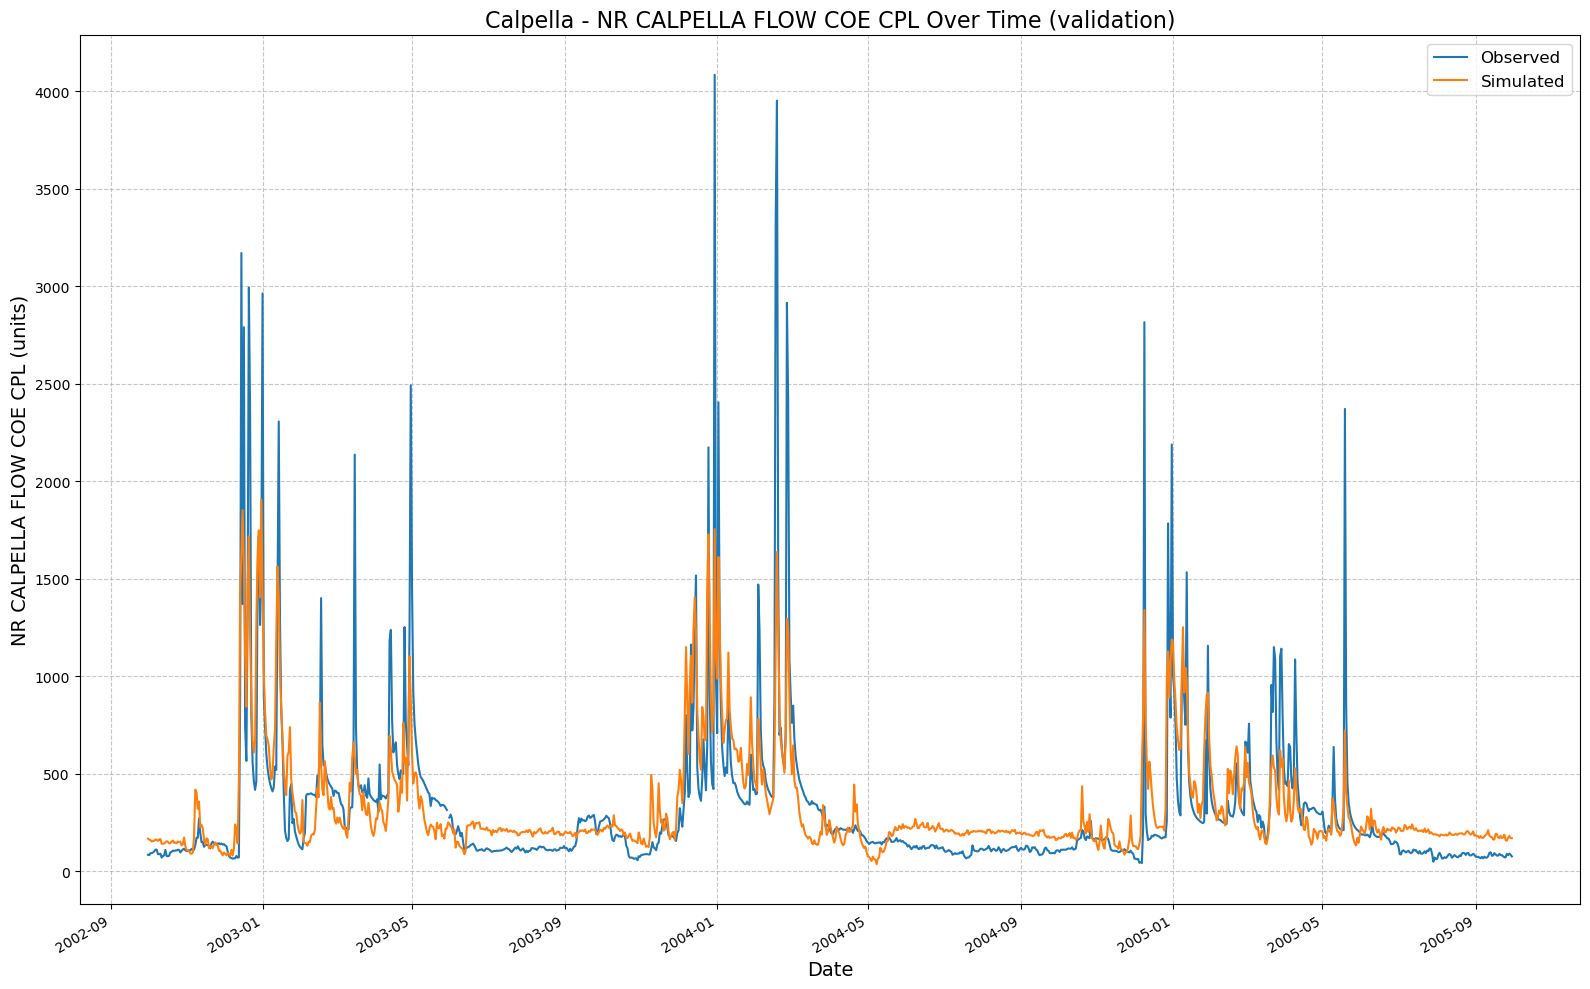

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1903_165000/results_output_validation.csv


/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [8]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily_results_path_csv, lstmNoPhysicsDaily_results_metrics = lstmNoPhysicsDaily.results() 

In [9]:
lstmNoPhysicsDaily_results_metrics

{'NSE': 0.6372462213039398,
 'MSE': 62143.453125,
 'RMSE': 249.28588633334218,
 'KGE': 0.6212572087886842,
 'Alpha-NSE': 0.6735333182820876,
 'Beta-KGE': 1.0289663076400757,
 'Beta-NSE': 0.022161312684911706,
 'Pearson-r': 0.8101933598518372,
 'FHV': -39.411818981170654,
 'FMS': -36.57517150227823,
 'FLV': -77.77341690833921,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 58.472223281860344,
 'PBIAS': -2.89662703871727}